# Monitor meeting spike

This notebooks plots a 'typical' meeting spike observation of CO2 concetrations in the Small (A) meeting room.

A one hour meeting observered from 10:00 to 12:00.

* _Input:_ Exported .csv from Airteq logged files.
* _Output:_ Saves a plot in .png format to disk

**Tasks:** 
* Loads the .csv files
* Removes irrelevant sensor data
* Plots the C02 concentrations in a timeframe

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [76]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [77]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [78]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Clean-up

### Load the full CSV

In [79]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'monitor-data/airteq_monitor_meeting_spike_data.csv'

full_data = import_csv(file)

print(full_data);

         a Date   Time   CO2   Temp    RH   PM1.0   PM2.5  PM10  TVOC     BP  \
0    2024/04/03  12:00   562   21'C   39%       1       1     1   228  99.97   
1    2024/04/03  11:59   561   22'C   39%       1       1     1   232  99.97   
2    2024/04/03  11:58   561   22'C   39%       1       1     1   232  99.97   
3    2024/04/03  11:57   565   22'C   39%       1       1     1   231  99.97   
4    2024/04/03  11:56   567   22'C   39%       1       1     1   228  99.97   
..          ...    ...   ...    ...   ...     ...     ...   ...   ...    ...   
116  2024/04/03  10:04   503   21'C   39%       0       0     0   137  99.97   
117  2024/04/03  10:03   503   21'C   39%       0       0     1   135  99.97   
118  2024/04/03  10:02   502   21'C   39%       1       1     1   135  99.97   
119  2024/04/03  10:01   503   21'C   39%       0       0     0   136  99.97   
120  2024/04/03  10:00   500   21'C   39%       1       1     1   138  99.97   

     O3  
0     0  
1     0  
2     0  

### Remove irrelevant rows

Remove rows the other sensory data irrelevant for this analysis.

In [80]:
def filter_columns(data):
    data.columns = data.columns.str.strip()
    filtered_df = data[['a Date', 'Time', 'CO2']]
    return filtered_df

filtered_data = filter_columns(full_data)
print(filtered_data)

         a Date   Time  CO2
0    2024/04/03  12:00  562
1    2024/04/03  11:59  561
2    2024/04/03  11:58  561
3    2024/04/03  11:57  565
4    2024/04/03  11:56  567
..          ...    ...  ...
116  2024/04/03  10:04  503
117  2024/04/03  10:03  503
118  2024/04/03  10:02  502
119  2024/04/03  10:01  503
120  2024/04/03  10:00  500

[121 rows x 3 columns]


### Plot the CO2 distribution

         a Date   Time  CO2
120  2024/04/03  10:00  500
119  2024/04/03  10:01  503
118  2024/04/03  10:02  502
117  2024/04/03  10:03  503
116  2024/04/03  10:04  503
..          ...    ...  ...
4    2024/04/03  11:56  567
3    2024/04/03  11:57  565
2    2024/04/03  11:58  561
1    2024/04/03  11:59  561
0    2024/04/03  12:00  562

[121 rows x 3 columns]


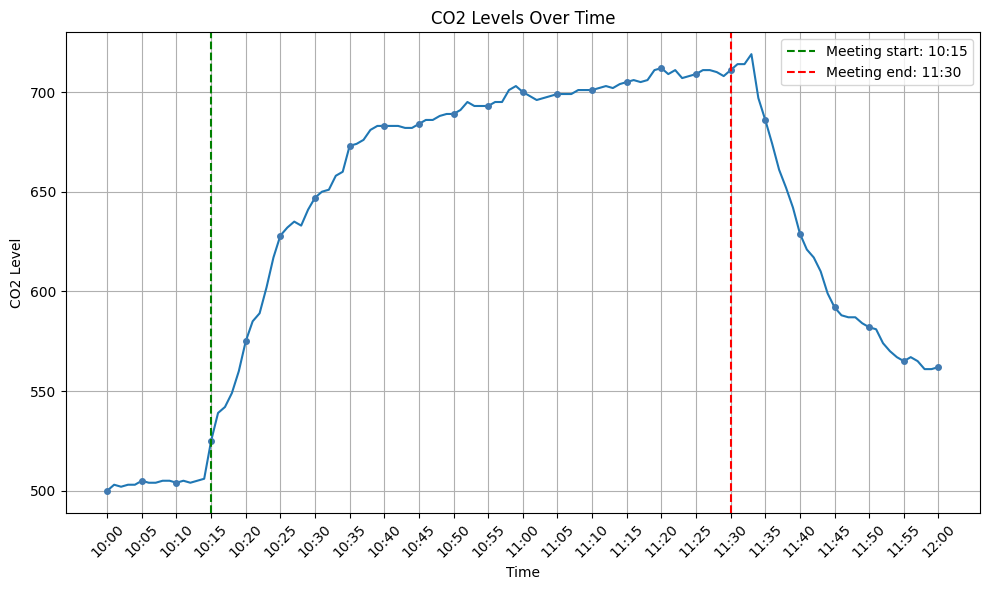

In [127]:
print(filtered_data)

# Convert 'Time' column to strings
filtered_data['Time'] = filtered_data['Time'].astype(str)

# Reverse the order of the DataFrame
filtered_data = filtered_data.iloc[::-1]

# Plot CO2 levels over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['CO2'], linestyle='-')
plt.title('CO2 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Level')

# Set x-axis ticks at intervals of 5 minutes
tick_positions = range(0, len(filtered_data), 5)
plt.xticks(tick_positions, filtered_data['Time'][tick_positions], rotation=45)

# Add markers at the 5-minute intervals
plt.plot(filtered_data.index[tick_positions], filtered_data['CO2'].iloc[tick_positions], marker='o', markersize=4, linestyle='', color='#407ab1')

# Reverse the x-axis
plt.gca().invert_xaxis()

# Add vertical lines for start and end of meeting
start_index = filtered_data[filtered_data['Time'] == '10:15'].index[0]
end_index = filtered_data[filtered_data['Time'] == '11:30'].index[0]
plt.axvline(x=start_index, color='green', linestyle='--', label='Meeting start: 10:15')
plt.axvline(x=end_index, color='red', linestyle='--', label='Meeting end: 11:30')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()